**Import Libraries**

In [1]:

!pip install librosa
!pip install keras
!pip install tensorflow
!pip install ffmpeg

In [2]:

import os
import glob
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fftpack
from scipy.stats import kurtosis,skew,mode
import sklearn.preprocessing,sklearn.decomposition
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,train_test_split
from keras import utils
import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten,Reshape, BatchNormalization, ZeroPadding2D,MaxPooling1D,AveragePooling1D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers,optimizers
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import librosa
import soundfile as sf

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd

In [4]:
pip install librosa numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import shutil
import pandas as pd
import numpy as np


excel_file_path = '/Users/anuraagthakur/Desktop/Data/IndianAccent.csv'
source_folder = '/Users/anuraagthakur/Desktop/en/clips'
destination_folder = '/Users/anuraagthakur/Desktop/Data/Accent1'


df = pd.read_csv(excel_file_path)


print("DataFrame columns:", df.columns)


file_names = df['new_id'].tolist()[:10000]  


os.makedirs(destination_folder, exist_ok=True)


for i, file_name in enumerate(file_names):
    source_file = os.path.join(source_folder, str(file_name) + '.mp3')
    if os.path.isfile(source_file): 
        shutil.copy(source_file, destination_folder)
        print(f'Copied: {source_file}')
    else:
        print(f'File not found: {source_file}')

print('File extraction complete.')


DataFrame columns: Index(['new_id', 'accent'], dtype='object')
Copied: /Users/anuraagthakur/Desktop/en/clips/3f7acd83d2ce93f16906e664b3c4e64757c619e2df72a9ae0661435c03d68c599229b065a3ab2fe3266a62bf0592a741dd36f2c13fbb8343d1759ae1975cb1c0.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/cb511db06ac2c224fd7a378c70c4ed07feeee833c0448d10e0edaa0144d2652f69c8af34dfaebf90fa3db64be6302b66e3db8293a63554d865b3019113475002.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/d55d527503160477c1f295d6d766e051e7319197ef208a9e451817a8c70e3ddd12bfe7615b9a6d3c2f37d5019782a090bd2da4d3dad8197c16302e1b191c4361.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/5def04f21d7bf0e261bd74e099500532c48d6fb9e892513ebc3e1c66104170a6d566895af3c654095a59a4fcb66c0a3f655618b01db1ba5ce600ab1f11294c9e.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/ea275ffd8ca4ce3571a3543ff0a5243af8f16dcc23281a32a973b3bef358741e29b1ab5e57a07bead2783811e12991a4dbdc8a96b0ac2a99d7b9f606ddc2deba.mp3
Copied: /Users/anuraagthakur/Desktop/en/cl

In [4]:
import os
import shutil
import pandas as pd
import numpy as np


excel_file_path = '/Users/anuraagthakur/Desktop/Data/USAccent.csv'
source_folder = '/Users/anuraagthakur/Desktop/en/clips'
destination_folder = '/Users/anuraagthakur/Desktop/Data/Accent2'


df = pd.read_csv(excel_file_path)


print("DataFrame columns:", df.columns)

file_names = df['new_id'].tolist()[:10000]  


os.makedirs(destination_folder, exist_ok=True)


for i, file_name in enumerate(file_names):
    source_file = os.path.join(source_folder, str(file_name) + '.mp3')
    if os.path.isfile(source_file): 
        shutil.copy(source_file, destination_folder)
        print(f'Copied: {source_file}')
    else:
        print(f'File not found: {source_file}')

print('File extraction complete.')


DataFrame columns: Index(['new_id', 'accent'], dtype='object')
Copied: /Users/anuraagthakur/Desktop/en/clips/2f8392c2dfa63d2a7fdfebc053f9eff02246387575e2050741e587840e336405f2aa4e329210d8f5396da7c234626bcbf1291c21d98c49542195a54f21a968c7.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/b6f47f10270cbe61f693c68c6a881a5a982ff4ff5e0c773fbb46d490e5401c1e29199ad3469d5a9be93c7416497e7b6e8c6ddc72a79aebde9f9c1e4a2e94432c.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/8e6bc44a1aeb601f0e9f54a43465fb90dc0846f3399c35bb06bfd16b4199abf7775c8ef80252f509433ab0901821cc401f621be76be6e952fadc5eac11b8dd11.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/9d1532205a4016223e2acb8644a8efc460179274b15811ab8decb256b7ee6dbb535f4677f49645c0238f67bae00bce62805e901fcb347672f58a06bc72f31f1e.mp3
Copied: /Users/anuraagthakur/Desktop/en/clips/0cc16b4932314c3f42421adf4c6ee7f863b1b01659d2896e68d7e43c7c39705146e740cee2c894c1a31890da2e98a07bd8fbb24fc1955e9f228306cd45c99eff.mp3
Copied: /Users/anuraagthakur/Desktop/en/cl

In [5]:
import librosa
import soundfile as sf
import numpy as np
from scipy.stats import skew, kurtosis

def extract_mfcc_features(audio_file, target_sr=44100, n_mfcc=21):
    """Extract MFCC features and pitch (fundamental frequency) from an audio file."""
    
    mfcc_features = list()
    

    y, sr = sf.read(audio_file)
    

    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    

    sr = target_sr
    

    window_size_ms = 20 / 1000  
    hop_size_ms = 10 / 1000     
    

    window_size_samples = int(sr * window_size_ms)  
    hop_size_samples = int(sr * hop_size_ms)        
    

    mfccs = librosa.feature.mfcc(y=y_resampled, sr=sr, n_mfcc=n_mfcc, n_fft=window_size_samples * 2, hop_length=hop_size_samples)
    

    mean_mfcc = np.mean(mfccs, axis=1)
    median_mfcc = np.median(mfccs, axis=1)
    std_mfcc = np.std(mfccs, axis=1)
    skew_mfcc = skew(mfccs, axis=1)
    kurt_mfcc = kurtosis(mfccs, axis=1)
    maximum_mfcc = np.amax(mfccs, axis=1)
    minimum_mfcc = np.amin(mfccs, axis=1)
    

    add_list = np.concatenate((mean_mfcc, median_mfcc, std_mfcc, skew_mfcc, kurt_mfcc, maximum_mfcc, minimum_mfcc))
    

    pitches, magnitudes = librosa.core.piptrack(y=y_resampled, sr=sr)
    

    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  
        pitch_values.append(pitches[index, t] if magnitudes[index, t] > 0 else 0)  
    
    pitch_values = np.array(pitch_values)
    

    mean_pitch = np.mean(pitch_values)
    std_pitch = np.std(pitch_values)
    median_pitch = np.median(pitch_values)
    min_pitch = np.min(pitch_values)
    max_pitch = np.max(pitch_values)
    

    pitch_features = np.array([mean_pitch, std_pitch, median_pitch, min_pitch, max_pitch])
    
   
    final_features = np.concatenate((add_list, pitch_features))
    
    mfcc_features.append(final_features)
    
    return mfcc_features


In [6]:
import librosa
import soundfile as sf
import numpy as np
from scipy.stats import skew, kurtosis

def extract_mfcc_features(audio_file, target_sr=44100, n_mfcc=21):
    """Extract MFCC features, pitch (fundamental frequency), and zero-crossing rate (ZCR) from an audio file."""
    
    mfcc_features = list()
    

    y, sr = sf.read(audio_file)
    

    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    

    sr = target_sr
    

    window_size_ms = 20 / 1000  
    hop_size_ms = 10 / 1000     
    

    window_size_samples = int(sr * window_size_ms)  
    hop_size_samples = int(sr * hop_size_ms)        
    

    mfccs = librosa.feature.mfcc(y=y_resampled, sr=sr, n_mfcc=n_mfcc, n_fft=window_size_samples * 2, hop_length=hop_size_samples)
    

    mean_mfcc = np.mean(mfccs, axis=1)
    median_mfcc = np.median(mfccs, axis=1)
    std_mfcc = np.std(mfccs, axis=1)
    skew_mfcc = skew(mfccs, axis=1)
    kurt_mfcc = kurtosis(mfccs, axis=1)
    maximum_mfcc = np.amax(mfccs, axis=1)
    minimum_mfcc = np.amin(mfccs, axis=1)
    

    add_list = np.concatenate((mean_mfcc, median_mfcc, std_mfcc, skew_mfcc, kurt_mfcc, maximum_mfcc, minimum_mfcc))
    

    pitches, magnitudes = librosa.core.piptrack(y=y_resampled, sr=sr)
    

    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  
        pitch_values.append(pitches[index, t] if magnitudes[index, t] > 0 else 0)  
    
    pitch_values = np.array(pitch_values)
    

    mean_pitch = np.mean(pitch_values)
    std_pitch = np.std(pitch_values)
    median_pitch = np.median(pitch_values)
    min_pitch = np.min(pitch_values)
    max_pitch = np.max(pitch_values)
    

    pitch_features = np.array([mean_pitch, std_pitch, median_pitch, min_pitch, max_pitch])
    

    zcr = librosa.feature.zero_crossing_rate(y_resampled, hop_length=hop_size_samples)
    
 
    mean_zcr = np.mean(zcr)
    std_zcr = np.std(zcr)
    median_zcr = np.median(zcr)
    max_zcr = np.max(zcr)
    min_zcr = np.min(zcr)
    

    zcr_features = np.array([mean_zcr, std_zcr, median_zcr, max_zcr, min_zcr])
    

    final_features = np.concatenate((add_list, pitch_features, zcr_features))
    
    mfcc_features.append(final_features)
    
    return mfcc_features


In [7]:
def load_data(data_dir, label_mapping):
    """Load audio data and extract features."""
    features = []
    labels = []
    for filename in os.listdir(data_dir):
        file_path = os.path.join(data_dir, filename)
        if filename.endswith('.mp3'):
            mfccs = extract_mfcc_features(file_path)
            features.append(mfccs)
            labels.append(label_mapping)
    return np.array(features), np.array(labels)

In [8]:
import os
import numpy as np
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import soundfile as sf


data_directory_1 = '/Users/anuraagthakur/Desktop/Data/Accent1'
X1, y1 = load_data(data_directory_1, 0)

data_directory_2 = '/Users/anuraagthakur/Desktop/Data/Accent2'
X2, y2 = load_data(data_directory_2, 1)


X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

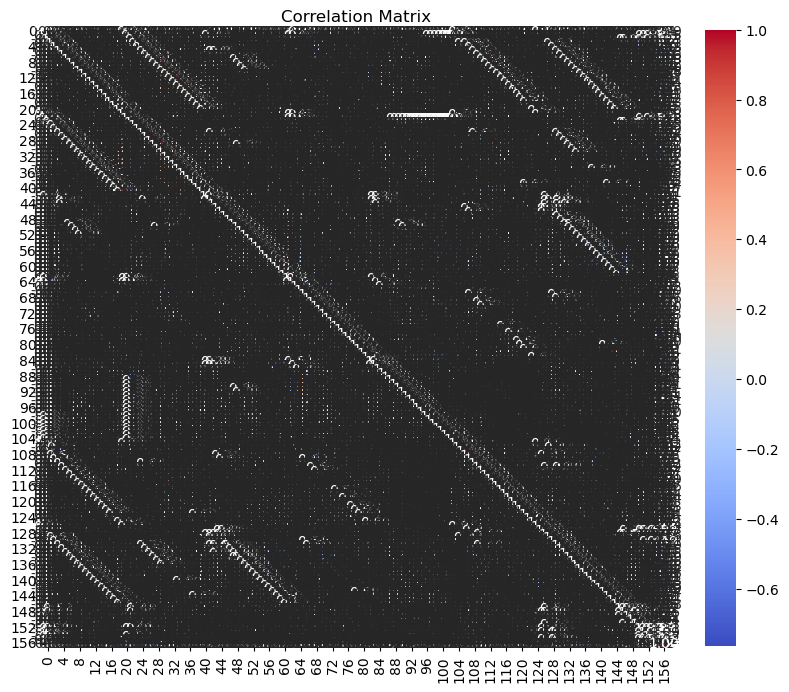

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_reshaped = X.reshape(X.shape[0], -1)

df = pd.DataFrame(X_reshaped)


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  


pca = PCA(n_components=n_components_90)
X_pca_90 = pca.fit_transform(X_scaled)


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [19]:
print(X_pca.shape)
print(y.shape)


X_train, X_temp, y_train, y_temp = train_test_split(X_pca_90, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



clf = RandomForestClassifier()


param_grid = {
    'n_estimators': [50,150,200,250],
    'max_depth': [10, 40, 60],
    'min_samples_split': [2,4,10,20],
}




(20000, 157)
(20000,)


In [20]:

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)  

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=kf, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_clf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


y_val_pred = best_clf.predict(X_val)


print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = best_clf.predict(X_test)


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


incorrect_predictions = sum(abs(y_test - y_test_pred))
print("Number of incorrect predictions in test set:", incorrect_predictions)


cv_scores = cross_val_score(best_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-validation scores on training set:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters found:  {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 250}
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       980
           1       0.82      0.80      0.81      1020

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1039
           1       0.80      0.80      0.80       961

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

Number of incorrect predictions in test set: 387
Cross-validation scores on training set: [0.78125   0.7825    0.7840625 0.78875   0.786875 ]
Mean cross-validation score: 0.7846874999999999


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9],
    'weights': ['uniform', 'distance'],
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)



y_val_pred = best_knn.predict(X_val)


print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = best_knn.predict(X_test)


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

incorrect_predictions = sum(abs(y_test - y_test_pred))
print("Number of incorrect predictions in test set:", incorrect_predictions)


cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores on training set:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best parameters found:  {'n_neighbors': 1, 'weights': 'uniform'}
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.94      0.91      0.92      1020

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1039
           1       0.95      0.93      0.94       961

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Number of incorrect predictions in test set: 117
Cross-validation scores on training set: [0.9128125 0.9253125 0.9240625 0.9215625 0.9209375]
Mean cross-validation score: 0.9209375


In [22]:
from scipy import stats

print(X1.shape)
print(X2.shape)


t_stat, p_value = stats.ttest_ind(X1.reshape(X1.shape[0], -1), X2.reshape(X2.shape[0], -1))

print("T-statistic:", t_stat)
print("P-value:", p_value)

(10000, 1, 157)
(10000, 1, 157)
T-statistic: [ 1.53278524e+01  2.95705479e+01  2.53742719e+01 -1.13410497e+01
  2.22665526e+01 -4.64921450e-03 -2.32941099e+00 -5.10787441e+00
  4.80742345e+00  7.59461335e+00 -1.29269607e+01 -1.85132041e+00
 -8.22216640e+00 -4.33733909e+00  9.71264747e+00 -4.92974549e+00
 -8.13701495e+00  4.99100733e+00 -2.48411800e+00 -1.21579194e+01
 -6.30888143e-01  1.41472451e+01  2.80248026e+01  1.77745996e+01
 -8.09853746e+00  1.63190499e+01  1.92864033e+00 -6.35524177e+00
 -4.73246781e+00  1.97034251e+00  2.33265245e+00 -1.32054973e+01
 -4.18273847e+00 -7.26765563e+00 -7.16976102e+00  6.90815020e+00
 -4.50379989e+00 -8.67705247e+00  2.99243752e+00 -3.25856301e+00
 -1.30610568e+01 -1.75127192e+00 -2.89370457e+01 -1.21618847e+01
 -1.39275728e+01 -1.77038042e+01 -7.44648379e+00 -3.69437918e+00
 -8.26592175e+00  6.43681724e+00 -6.85011941e+00 -1.62121171e+01
  5.37073986e+00  4.31727582e-01 -4.54941491e+00 -7.40033487e+00
 -2.98160547e+00  2.60844138e+00  3.94714985e

In [23]:
##Cleaned Up Audio

In [24]:

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd

def reduce_noise_spectral_subtraction(y, sr, noise_reduction_factor=6):

    stft = librosa.stft(y)
    stft_magnitude, stft_phase = librosa.magphase(stft)
    

    noise_magnitude = np.mean(stft_magnitude[:, :int(sr * 0.0005)], axis=1)
    

    noise_estimate = noise_reduction_factor * noise_magnitude[:, np.newaxis]
    

    stft_magnitude_denoised = np.maximum(stft_magnitude - noise_estimate, 0)
    
    stft_denoised = stft_magnitude_denoised * stft_phase
    
    y_denoised = librosa.istft(stft_denoised)
    
    return y_denoised


In [25]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
import numpy as np
import soundfile as sf
import librosa

def extract_mfcc_features(y, sr=44100, n_mfcc=13):
    """Extract MFCC features from an audio signal."""
    mfcc_features=list()

    window_size_ms = 20/1000  
    hop_size_ms = 10/1000     


    window_size_samples = int(sr * window_size_ms)  
    hop_size_samples = int(sr * hop_size_ms)       


    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=window_size_samples*2, hop_length=hop_size_samples)


    mean_mfcc = np.mean(mfccs, axis=1)  
    median_mfcc= np.median(mfccs,axis=1)
    std_mfcc = np.std(mfccs, axis=1)
    skew_mfcc = skew(mfccs, axis=1)
    kurt_mfcc = kurtosis(mfccs, axis=1)
    maximum_mfcc = np.amax(mfccs, axis=1)
    minimum_mfcc = np.amin(mfccs, axis=1)
    
    add_list = np.concatenate((mean_mfcc, median_mfcc, std_mfcc, skew_mfcc, kurt_mfcc, maximum_mfcc, minimum_mfcc))
    
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  
        pitch_values.append(pitches[index, t] if magnitudes[index, t] > 0 else 0)  
    
    pitch_values = np.array(pitch_values)
    
    mean_pitch = np.mean(pitch_values)
    std_pitch = np.std(pitch_values)
    median_pitch = np.median(pitch_values)
    min_pitch = np.min(pitch_values)
    max_pitch = np.max(pitch_values)
    
    pitch_features = np.array([mean_pitch, std_pitch, median_pitch, min_pitch, max_pitch])

    zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_size_samples)
    
    mean_zcr = np.mean(zcr)
    std_zcr = np.std(zcr)
    median_zcr = np.median(zcr)
    max_zcr = np.max(zcr)
    min_zcr = np.min(zcr)
    
    zcr_features = np.array([mean_zcr, std_zcr, median_zcr, max_zcr, min_zcr])
    
    final_features = np.concatenate((add_list, pitch_features, zcr_features))
    
    mfcc_features.append(final_features)
    
    return mfcc_features


def calculate_snr_for_folder(folder_path, label_mapping):
    features = []
    labels = []
    audio_extensions = ('.wav', '.flac', '.ogg', '.mp3')  # Add other audio extensions if needed
    for filename in os.listdir(folder_path):
        if filename.endswith(audio_extensions):
            file_path = os.path.join(folder_path, filename)
            audio_signal, fs = sf.read(file_path)
            audio_signal = reduce_noise_spectral_subtraction(audio_signal, fs, noise_reduction_factor=0.3)
            audio_signal = librosa.resample(audio_signal, orig_sr=fs, target_sr=44100)
            mfccs = extract_mfcc_features(audio_signal, fs, n_mfcc=13)
            features.append(mfccs)
            labels.append(label_mapping)  
    return np.array(features), np.array(labels)




In [27]:


folder_path = '/Users/anuraagthakur/Desktop/Data/Accent1'

A,B=calculate_snr_for_folder(folder_path,0)




In [28]:

folder_path = '/Users/anuraagthakur/Desktop/Data/Accent2'


C,D=calculate_snr_for_folder(folder_path,1)


In [29]:
print(A.shape)
print(B.shape)

print(C.shape)
print(D.shape)


(10000, 1, 101)
(10000,)
(10000, 1, 101)
(10000,)


In [30]:
ya
X = np.vstack((A, C))
y = np.concatenate((B, D))


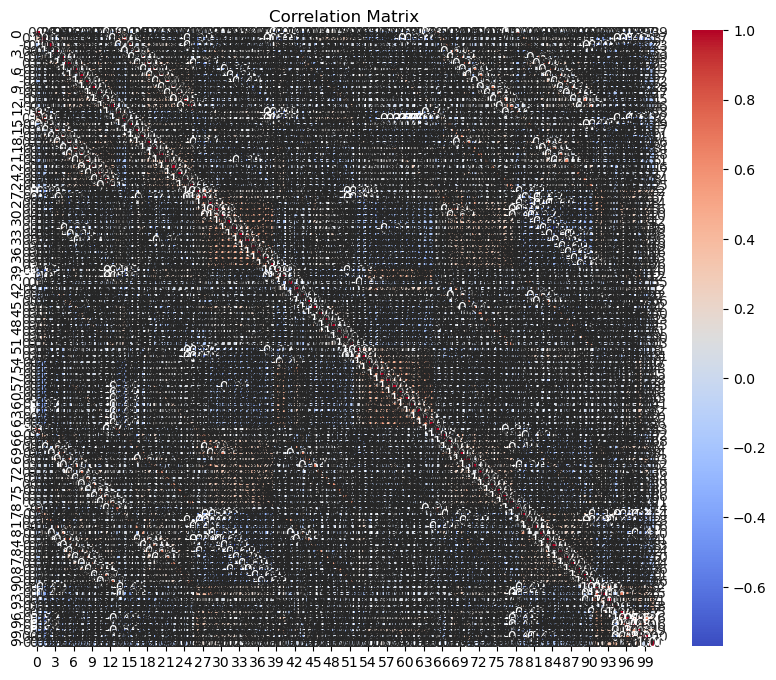

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_reshaped = X.reshape(X.shape[0], -1)

df = pd.DataFrame(X_reshaped)


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  


pca = PCA(n_components=n_components_90)
X_pca_90 = pca.fit_transform(X_scaled)


In [33]:
print(X_pca.shape)
print(y.shape)


X_train, X_temp, y_train, y_temp = train_test_split(X_pca_90, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



clf = RandomForestClassifier()


param_grid = {
    'n_estimators': [50,150,200,250],
    'max_depth': [10, 40, 60],
    'min_samples_split': [2,4,10,20],
}




(20000, 101)
(20000,)


In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report
import numpy as np

In [35]:

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)  

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=kf, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_clf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


y_val_pred = best_clf.predict(X_val)


print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = best_clf.predict(X_test)


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


incorrect_predictions = sum(abs(y_test - y_test_pred))
print("Number of incorrect predictions in test set:", incorrect_predictions)


cv_scores = cross_val_score(best_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-validation scores on training set:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters found:  {'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 200}
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       980
           1       0.78      0.78      0.78      1020

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1039
           1       0.78      0.79      0.79       961

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Number of incorrect predictions in test set: 413
Cross-validation scores on training set: [0.77875   0.758125  0.7565625 0.7703125 0.7734375]
Mean cross-validation score: 0.7674375000000001


In [36]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

y_val_pred = best_knn.predict(X_val)

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

y_test_pred = best_knn.predict(X_test)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

incorrect_predictions = sum(abs(y_test - y_test_pred))
print("Number of incorrect predictions in test set:", incorrect_predictions)

cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores on training set:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best parameters found:  {'n_neighbors': 4, 'weights': 'distance'}
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       980
           1       0.91      0.87      0.89      1020

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1039
           1       0.89      0.88      0.89       961

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Number of incorrect predictions in test set: 218
Cross-validation scores on training set: [0.8678125 0.8690625 0.8796875 0.8715625 0.868125 ]
Mean cross-validation score: 0.8712499999999999


In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'], 
}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


y_val_pred = best_svm.predict(X_val)


print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = best_svm.predict(X_test)


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


incorrect_predictions = sum(abs(y_test - y_test_pred))
print("Number of incorrect predictions in test set:", incorrect_predictions)


cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores on training set:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       980
           1       0.88      0.90      0.89      1020

    accuracy                           0.89      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.89      0.88      2000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1039
           1       0.86      0.88      0.87       961

    accuracy                           0.88      2000
   macro avg       0.87      0.88      0.87      2000
weighted avg       0.88      0.88      0.88      2000

Number of incorrect predictions in test set: 250
Cross-validation scores on training set: [0.8640625 0.86875   0.878125  0.8653125 0.8609375]
Mean cross-validation score: 0.8674375000000001


In [37]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(X1.reshape(X1.shape[0], -1), X2.reshape(X2.shape[0], -1))

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: [ 1.53278524e+01  2.95705479e+01  2.53742719e+01 -1.13410497e+01
  2.22665526e+01 -4.64921450e-03 -2.32941099e+00 -5.10787441e+00
  4.80742345e+00  7.59461335e+00 -1.29269607e+01 -1.85132041e+00
 -8.22216640e+00 -4.33733909e+00  9.71264747e+00 -4.92974549e+00
 -8.13701495e+00  4.99100733e+00 -2.48411800e+00 -1.21579194e+01
 -6.30888143e-01  1.41472451e+01  2.80248026e+01  1.77745996e+01
 -8.09853746e+00  1.63190499e+01  1.92864033e+00 -6.35524177e+00
 -4.73246781e+00  1.97034251e+00  2.33265245e+00 -1.32054973e+01
 -4.18273847e+00 -7.26765563e+00 -7.16976102e+00  6.90815020e+00
 -4.50379989e+00 -8.67705247e+00  2.99243752e+00 -3.25856301e+00
 -1.30610568e+01 -1.75127192e+00 -2.89370457e+01 -1.21618847e+01
 -1.39275728e+01 -1.77038042e+01 -7.44648379e+00 -3.69437918e+00
 -8.26592175e+00  6.43681724e+00 -6.85011941e+00 -1.62121171e+01
  5.37073986e+00  4.31727582e-01 -4.54941491e+00 -7.40033487e+00
 -2.98160547e+00  2.60844138e+00  3.94714985e+00 -1.98781004e+00
 -4.20314771